In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

# Other ETFs as additional risk factors

In [3]:
bbh =  ['MRNA', 'AMGN', 'IQV', 'ICLR', 'VRTX', 'GILD', 'REGN', 'ILMN', 'CRL', 'SGEN', 'BIIB', 
        'TECH', 'BNTX', 'BGNE', 'EXAS', 'ALNY', 'NVAX', 'QGEN', 'GH', 'NTRA', 'BMRN', 'INCY', 
        'TXG', 'NTLA', 'CRSP']

stocks = bbh
etfs = ['BBH', 'IDNA', 'SPY']

spy = pd.read_csv('spy_ohlc.csv', index_col=0)
prices = pd.read_csv('bbh_idna.csv', index_col=0)
prices['SPY'] = spy['5. adjusted close']
prices = prices[stocks+etfs]

returns = prices.pct_change().dropna()
returns

,MRNA,AMGN,IQV,ICLR,VRTX,GILD,REGN,ILMN,CRL,SGEN,...,GH,NTRA,BMRN,INCY,TXG,NTLA,CRSP,BBH,IDNA,SPY
2019-10-11,-0.007415,0.010670,0.007523,-0.002036,0.012866,0.011540,0.008077,0.014756,0.017583,0.012876,...,0.016513,0.041304,0.012856,0.004619,0.017754,0.014266,0.004075,0.009710,0.010375,0.010367
2019-10-14,-0.008894,0.010408,0.002603,-0.010831,0.006844,0.008126,0.015527,0.025547,0.005935,-0.002179,...,0.042560,0.030491,-0.001781,0.017604,0.019473,-0.010436,-0.007576,0.011895,0.000790,-0.001114
2019-10-15,0.028715,0.008724,0.001366,0.002702,0.014690,0.012246,-0.005304,0.005994,0.001270,0.011648,...,0.023372,0.026970,0.018888,0.013684,-0.031834,0.041265,0.034896,0.010921,0.018153,0.009900
2019-10-16,-0.012561,-0.007085,-0.011804,0.007942,-0.000284,0.000766,-0.014548,-0.008008,0.005147,0.005757,...,-0.010049,-0.074452,-0.008320,-0.005094,0.050760,-0.003963,-0.005532,-0.006432,0.001714,-0.001606
2019-10-17,0.027562,0.001722,-0.010219,-0.000704,0.009257,-0.001836,0.007248,0.002842,0.009721,0.024803,...,0.042141,0.046556,-0.000589,-0.008833,0.014864,0.003537,0.004238,0.005478,0.015640,0.002949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,0.049202,0.010097,0.005889,0.008137,-0.013645,0.013276,0.006430,0.009098,-0.019690,-0.003203,...,-0.023516,-0.018081,0.103111,-0.009519,0.001469,-0.040178,-0.006388,0.007925,0.000839,-0.001788
2021-11-22,0.071689,-0.016256,-0.002536,-0.016317,-0.007546,0.018634,-0.013851,-0.005773,-0.013241,-0.040845,...,0.004304,-0.039833,-0.012791,-0.018137,-0.014737,-0.036917,-0.022441,0.003672,-0.013836,-0.002815
2021-11-23,-0.022321,0.008879,-0.008299,-0.026853,0.029477,0.009433,0.008825,-0.030253,-0.012992,-0.013059,...,-0.052143,-0.035732,-0.005648,0.007420,-0.003249,-0.069687,-0.006328,-0.011286,-0.013146,0.001326
2021-11-24,-0.010818,-0.002738,0.000339,-0.000365,-0.003265,-0.007929,-0.001756,-0.000492,0.020352,-0.003567,...,0.154591,0.005967,-0.002450,0.045918,0.025260,-0.004224,0.010490,0.002919,0.002604,0.002670


<ipython-input-4-2ee4828c6744>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
<ipython-input-4-2ee4828c6744>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))


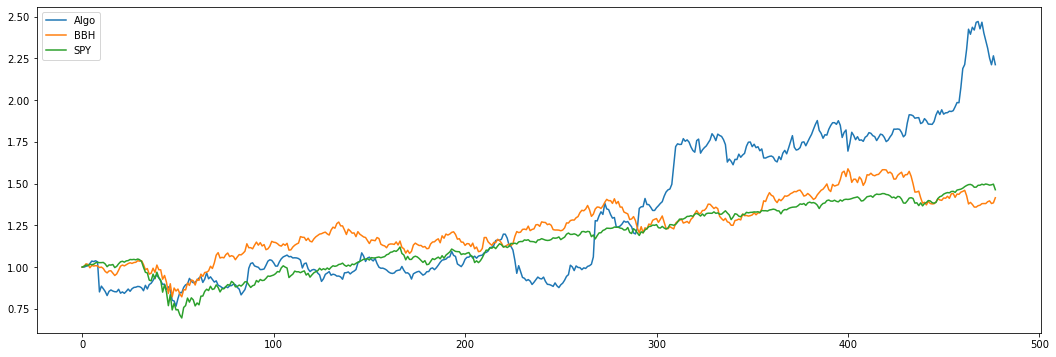

In [4]:
s_scores = pd.DataFrame(index=returns.iloc[59:].index, columns=stocks)
betas = pd.DataFrame(index=returns.iloc[59:].index, columns=stocks)

for t in returns.index[59:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=stocks, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in stocks:
        X = tmp_ret[etfs].values
        y = tmp_ret[stock].values
        model1 = Ridge().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']
    
s_scores.fillna(0, inplace=True)
    
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp
    
# calculate positions in ETFs
algo_weights[etfs] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

# calculate returns
ret = (returns.iloc[59:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

# calculate returns of SPY and BBH for comparison
spy = pd.read_csv('spy_ohlc.csv', index_col=0)
spy_returns = spy['5. adjusted close'].pct_change()
spy_returns = spy_returns.loc[returns.index]
spy_cumret = np.nancumprod(spy_returns.iloc[59:]+1)
bbh_cumret = np.nancumprod(returns.iloc[59:]['BBH']+1)

plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(bbh_cumret/bbh_cumret[0], label='BBH')
plt.plot(spy_cumret/spy_cumret[0], label='SPY')
plt.legend()

In [5]:
# fraction of returns to pay transaction costs for
tc_frac = abs(algo_pos.shift().diff()).sum(axis=1)/abs(algo_pos.shift()).sum(axis=1)
# assume two-way transaction cost of 0.1%
ret_tc = ret - 0.0005*2*tc_frac # multiply by 2 since we use 2x capital
cumret_tc = np.nancumprod(1+ret_tc)

In [6]:
results = pd.DataFrame(index=['SPY', 'BBH', 'Algo', 'Algo_with_tc'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['SPY'] = calculate_metrics(spy_cumret)
results.loc['BBH'] = calculate_metrics(bbh_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results.loc['Algo_with_tc'] = calculate_metrics(cumret_tc)
results

,total_return,apr,Sharpe,maxDD,maxDDD
SPY,0.463512,0.222352,0.912379,-0.336999,119.0
BBH,0.415285,0.200948,0.805146,-0.208774,105.0
Algo,1.212933,0.520079,1.290823,-0.267551,90.0
Algo_with_tc,0.854549,0.384887,1.046401,-0.274593,207.0


# PCA

In [7]:
stocks = bbh
etfs = ['BBH']

prices = pd.read_csv('bbh_idna.csv', index_col=0)
prices = prices[stocks+etfs]
returns = prices.pct_change().dropna()
returns

,MRNA,AMGN,IQV,ICLR,VRTX,GILD,REGN,ILMN,CRL,SGEN,...,NVAX,QGEN,GH,NTRA,BMRN,INCY,TXG,NTLA,CRSP,BBH
2019-10-11,-0.007415,0.010670,0.007523,-0.002036,0.012866,0.011540,0.008077,0.014756,0.017583,0.012876,...,0.017857,-0.005874,0.016513,0.041304,0.012856,0.004619,0.017754,0.014266,0.004075,0.009710
2019-10-14,-0.008894,0.010408,0.002603,-0.010831,0.006844,0.008126,0.015527,0.025547,0.005935,-0.002179,...,0.028509,0.005908,0.042560,0.030491,-0.001781,0.017604,0.019473,-0.010436,-0.007576,0.011895
2019-10-15,0.028715,0.008724,0.001366,0.002702,0.014690,0.012246,-0.005304,0.005994,0.001270,0.011648,...,0.029851,0.009545,0.023372,0.026970,0.018888,0.013684,-0.031834,0.041265,0.034896,0.010921
2019-10-16,-0.012561,-0.007085,-0.011804,0.007942,-0.000284,0.000766,-0.014548,-0.008008,0.005147,0.005757,...,-0.018634,0.001455,-0.010049,-0.074452,-0.008320,-0.005094,0.050760,-0.003963,-0.005532,-0.006432
2019-10-17,0.027562,0.001722,-0.010219,-0.000704,0.009257,-0.001836,0.007248,0.002842,0.009721,0.024803,...,-0.023207,0.023239,0.042141,0.046556,-0.000589,-0.008833,0.014864,0.003537,0.004238,0.005478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,0.049202,0.010097,0.005889,0.008137,-0.013645,0.013276,0.006430,0.009098,-0.019690,-0.003203,...,0.006752,-0.009996,-0.023516,-0.018081,0.103111,-0.009519,0.001469,-0.040178,-0.006388,0.007925
2021-11-22,0.071689,-0.016256,-0.002536,-0.016317,-0.007546,0.018634,-0.013851,-0.005773,-0.013241,-0.040845,...,0.081366,-0.006852,0.004304,-0.039833,-0.012791,-0.018137,-0.014737,-0.036917,-0.022441,0.003672
2021-11-23,-0.022321,0.008879,-0.008299,-0.026853,0.029477,0.009433,0.008825,-0.030253,-0.012992,-0.013059,...,-0.035002,-0.004176,-0.052143,-0.035732,-0.005648,0.007420,-0.003249,-0.069687,-0.006328,-0.011286
2021-11-24,-0.010818,-0.002738,0.000339,-0.000365,-0.003265,-0.007929,-0.001756,-0.000492,0.020352,-0.003567,...,-0.003189,-0.005287,0.154591,0.005967,-0.002450,0.045918,0.025260,-0.004224,0.010490,0.002919


In [8]:
evals, evecs = np.linalg.eig(returns[stocks].corr())

In [9]:
np.sort(evals)[::-1]

array([8.31843685, 2.07869708, 1.8061274 , 1.25570002, 1.00721348,
       0.87165342, 0.79909274, 0.79519337, 0.7633444 , 0.73366934,
       0.7160202 , 0.63209041, 0.5634559 , 0.53547669, 0.5182519 ,
       0.47115874, 0.44973522, 0.41214119, 0.40351376, 0.36781122,
       0.3569713 , 0.33709241, 0.31882441, 0.27878777, 0.2095408 ])

(0.0, 0.4)

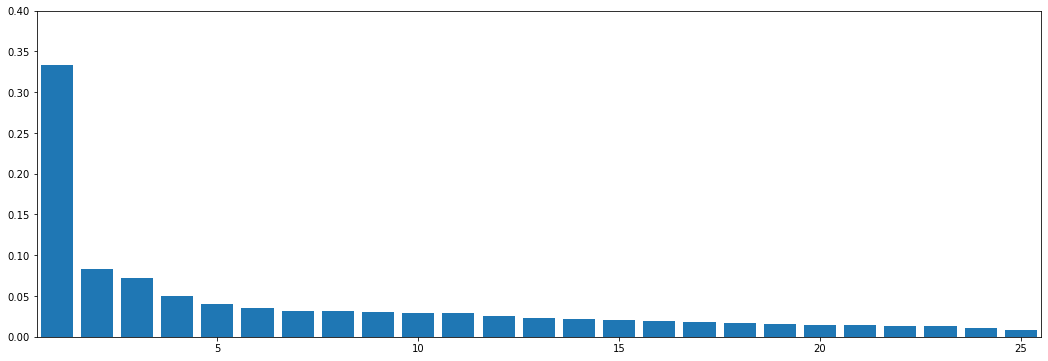

In [10]:
# plot eigenvalues measured as percentage of explained variance
plt.figure(figsize=(18,6))
plt.bar(np.arange(1,26), height=(np.sort(evals)[::-1])/evals.sum())
plt.xlim(0.5,25.5)
plt.ylim(0,0.4)

In [11]:
# calculate returns of the principal eigenportfolio
weights = evecs[:,0]/returns[stocks].std()
weights = weights/weights.sum()
ret_eig = np.cumprod((weights*returns[stocks]).sum(axis=1)+1)
ret_ind = np.cumprod(returns[etfs]+1) # returns of the market (ETF)

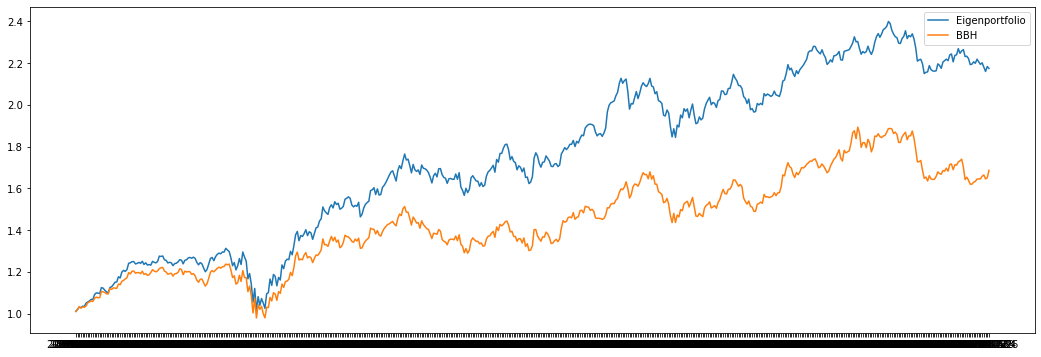

In [12]:
plt.figure(figsize=(18,6))
plt.plot(ret_eig, label='Eigenportfolio')
plt.plot(ret_ind, label='BBH')
plt.legend()

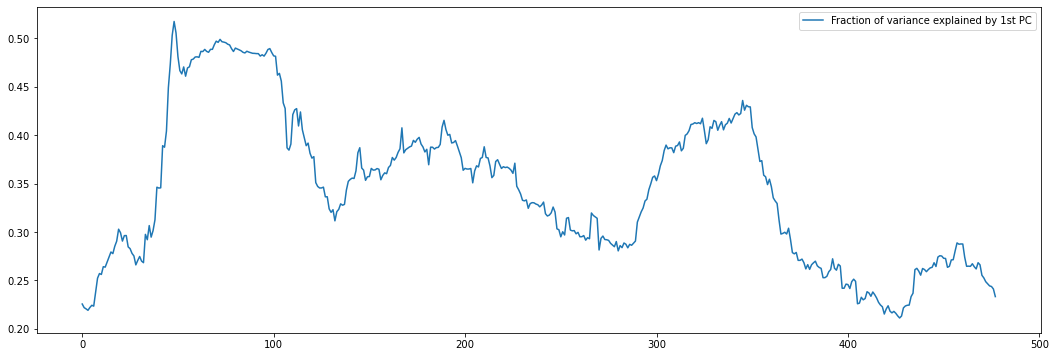

In [13]:
# evolution of percentage of variance explained by first PC
explained_variance = []

for t in returns.iloc[59:].index:
    tmp_ret = returns[stocks].loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    evals = np.linalg.eig(tmp_ret.corr())[0]
    evals = np.sort(evals)[::-1]
    explained_variance.append(evals[0]/evals.sum())
    
plt.figure(figsize=(18,6))
plt.plot(explained_variance, label='Fraction of variance explained by 1st PC')
plt.legend()

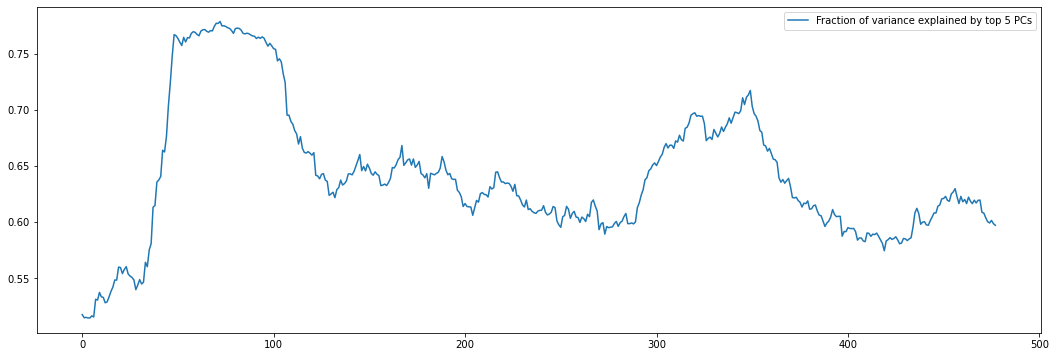

In [14]:
# evolution of percentage of variance explained by top 5 PCs
explained_variance = []

for t in returns.iloc[59:].index:
    tmp_ret = returns[stocks].loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    evals = np.linalg.eig(tmp_ret.corr())[0]
    evals = np.sort(evals)[::-1]
    explained_variance.append(evals[:5].sum()/evals.sum())
    
plt.figure(figsize=(18,6))
plt.plot(explained_variance, label='Fraction of variance explained by top 5 PCs')
plt.legend()

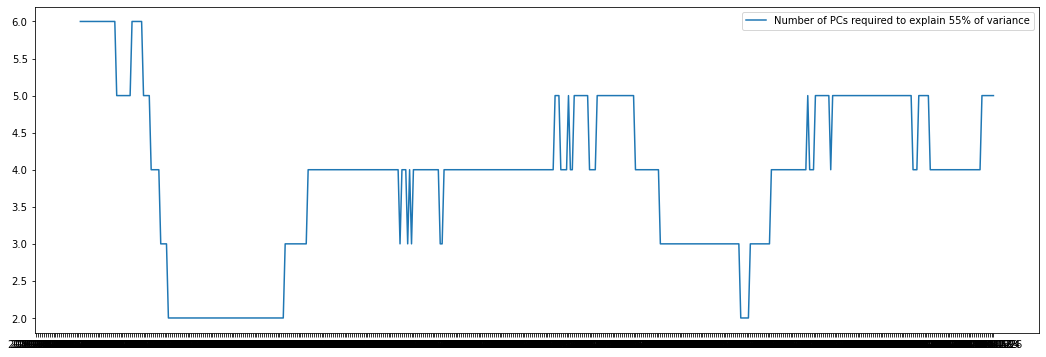

In [15]:
# number of PCs required to explain 55% of variance
num_components = pd.DataFrame(index=returns.index, columns=['n_comp'])

for t in returns.iloc[59:].index:
    tmp_ret = returns[stocks].loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    evals = np.linalg.eig(tmp_ret.corr())[0]
    evals = np.sort(evals)[::-1]
    explained_variance = evals/np.sum(evals)
    n_comp = np.where((np.cumsum(explained_variance))>=0.55)[0][0]+1
    num_components.loc[t] = n_comp
    
plt.figure(figsize=(18,6))
plt.plot(num_components, label='Number of PCs required to explain 55% of variance')
plt.legend()

In [16]:
num_components.mean()

n_comp    3.899582
dtype: float64

In [17]:
returns[['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6']] = np.nan

for t in returns.iloc[59:].index:
    tmp_ret = returns[stocks].loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    evals,evecs = np.linalg.eig(tmp_ret.corr())
    index = np.argsort(evals)[::-1]
    
    for i in range(1,7):
        weights = evecs[:,index[i]] / tmp_ret.std()
        # allocate equal amount of capital to long and short positions
        weights[weights<0] /= abs(weights[weights<0]).sum() 
        weights[weights>0] /= abs(weights[weights>0]).sum()
        returns.loc[t][f'eig{i}'] = (weights*tmp_ret.iloc[-1]).sum()
        

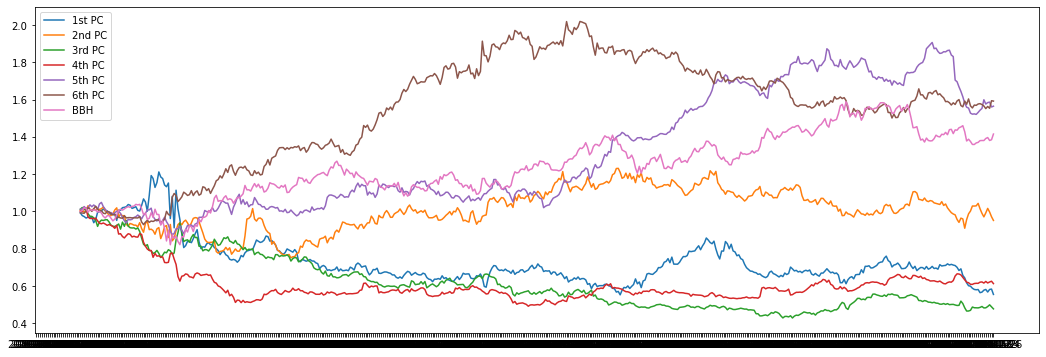

In [18]:
plt.figure(figsize=(18,6))
plt.plot(np.cumprod(returns['eig1']+1), label='1st PC')
plt.plot(np.cumprod(returns['eig2']+1), label='2nd PC')
plt.plot(np.cumprod(returns['eig3']+1), label='3rd PC')
plt.plot(np.cumprod(returns['eig4']+1), label='4th PC')
plt.plot(np.cumprod(returns['eig5']+1), label='5th PC')
plt.plot(np.cumprod(returns['eig6']+1), label='6th PC')
plt.plot(ret_ind.iloc[59:]/ret_ind.iloc[59], label='BBH')
plt.legend()

In [19]:
returns[['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6']].corr()

,eig1,eig2,eig3,eig4,eig5,eig6
eig1,1.000000,-0.124199,0.052225,-0.008282,0.101788,-0.024694
eig2,-0.124199,1.000000,0.111744,-0.096514,0.041569,-0.131274
eig3,0.052225,0.111744,1.000000,-0.046793,0.049168,-0.144436
eig4,-0.008282,-0.096514,-0.046793,1.000000,-0.041833,-0.036342
eig5,0.101788,0.041569,0.049168,-0.041833,1.000000,-0.067626
eig6,-0.024694,-0.131274,-0.144436,-0.036342,-0.067626,1.000000


# 1 PCA portfolio

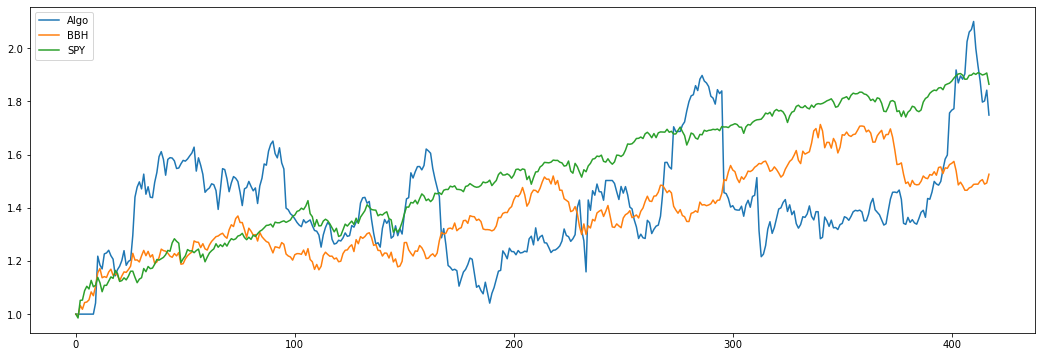

In [20]:
s_scores = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)
betas = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)

pcs = ['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6']
num_pc = 1

for t in returns.index[118:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=stocks, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in stocks:
        X = tmp_ret[pcs[:num_pc]].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp
    
# calculate positions in PCA portfolios
algo_weights[pcs[:num_pc]] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

# calculate returns
ret = (returns.iloc[119:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

# calculate returns of SPY and BBH for comparison
spy = pd.read_csv('spy_ohlc.csv', index_col=0)
spy_returns = spy['5. adjusted close'].pct_change()
spy_returns = spy_returns.loc[returns.index]
spy_cumret = np.nancumprod(spy_returns.loc[ret.index]+1)
bbh_cumret = np.nancumprod(returns.loc[ret.index]['BBH']+1)

plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(bbh_cumret/bbh_cumret[0], label='BBH')
plt.plot(spy_cumret/spy_cumret[0], label='SPY')
plt.legend()

In [21]:
results = pd.DataFrame(index=['SPY', 'BBH', 'Algo'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['SPY'] = calculate_metrics(spy_cumret)
results.loc['BBH'] = calculate_metrics(bbh_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results

,total_return,apr,Sharpe,maxDD,maxDDD
SPY,0.864096,0.455652,2.278106,-0.094362,48.0
BBH,0.525938,0.290176,1.19378,-0.147876,105.0
Algo,0.74831,0.40045,0.900162,-0.369126,182.0


# 4 PCA portfolios

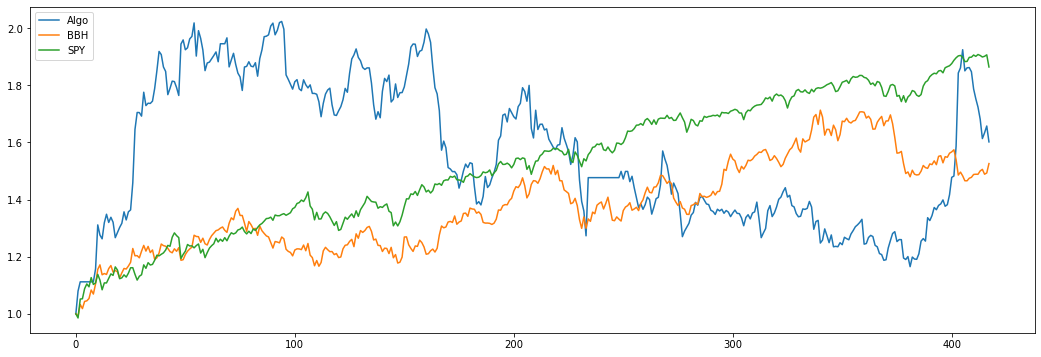

In [22]:
s_scores = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)
betas = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)

pcs = ['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6']
num_pc = 4

for t in returns.index[118:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=stocks, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in stocks:
        X = tmp_ret[pcs[:num_pc]].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp
    
# calculate positions in PCA portfolios
algo_weights[pcs[:num_pc]] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

# calculate returns
ret = (returns.iloc[119:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

# calculate returns of SPY and BBH for comparison
spy = pd.read_csv('spy_ohlc.csv', index_col=0)
spy_returns = spy['5. adjusted close'].pct_change()
spy_returns = spy_returns.loc[returns.index]
spy_cumret = np.nancumprod(spy_returns.loc[ret.index]+1)
bbh_cumret = np.nancumprod(returns.loc[ret.index]['BBH']+1)

plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(bbh_cumret/bbh_cumret[0], label='BBH')
plt.plot(spy_cumret/spy_cumret[0], label='SPY')
plt.legend()

In [23]:
results = pd.DataFrame(index=['SPY', 'BBH', 'Algo'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['SPY'] = calculate_metrics(spy_cumret)
results.loc['BBH'] = calculate_metrics(bbh_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results

,total_return,apr,Sharpe,maxDD,maxDDD
SPY,0.864096,0.455652,2.278106,-0.094362,48.0
BBH,0.525938,0.290176,1.19378,-0.147876,105.0
Algo,0.601894,0.328519,0.852694,-0.42417,323.0


# 6 PCA portfolios

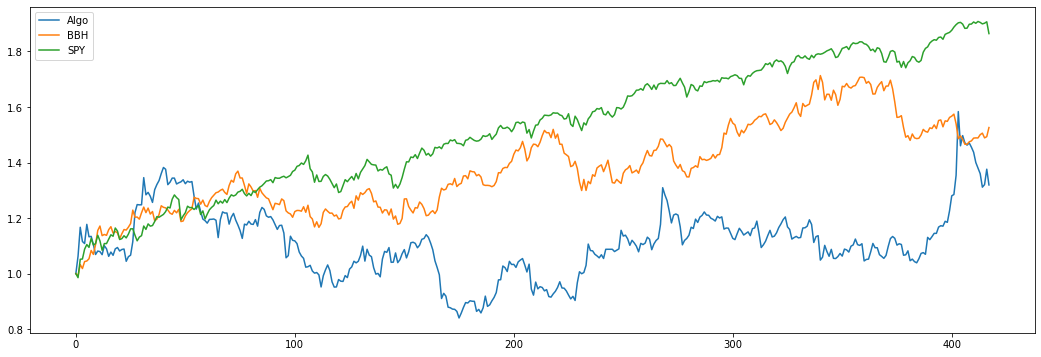

In [24]:
s_scores = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)
betas = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)

pcs = ['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6']
num_pc = 6

for t in returns.index[118:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=stocks, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in stocks:
        X = tmp_ret[pcs[:num_pc]].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp
    
# calculate positions in PCA portfolios
algo_weights[pcs[:num_pc]] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

# calculate returns
ret = (returns.iloc[119:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

# calculate returns of SPY and BBH for comparison
spy = pd.read_csv('spy_ohlc.csv', index_col=0)
spy_returns = spy['5. adjusted close'].pct_change()
spy_returns = spy_returns.loc[returns.index]
spy_cumret = np.nancumprod(spy_returns.loc[ret.index]+1)
bbh_cumret = np.nancumprod(returns.loc[ret.index]['BBH']+1)

plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(bbh_cumret/bbh_cumret[0], label='BBH')
plt.plot(spy_cumret/spy_cumret[0], label='SPY')
plt.legend()

In [25]:
results = pd.DataFrame(index=['SPY', 'BBH', 'Algo'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['SPY'] = calculate_metrics(spy_cumret)
results.loc['BBH'] = calculate_metrics(bbh_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results

,total_return,apr,Sharpe,maxDD,maxDDD
SPY,0.864096,0.455652,2.278106,-0.094362,48.0
BBH,0.525938,0.290176,1.19378,-0.147876,105.0
Algo,0.319334,0.181839,0.603081,-0.391945,362.0


# Taking volume into account

In [26]:
stocks = bbh
etfs = ['BBH']

prices = pd.read_csv('bbh_idna.csv', index_col=0)
prices = prices[stocks+etfs]
returns = prices.pct_change().dropna()

volume = pd.read_csv('bbh_idna_volume.csv', index_col=0)
volume = volume[stocks+etfs]

In [27]:
modified_returns = ((volume.rolling(60).mean()/volume).loc[returns.index] * returns).dropna()

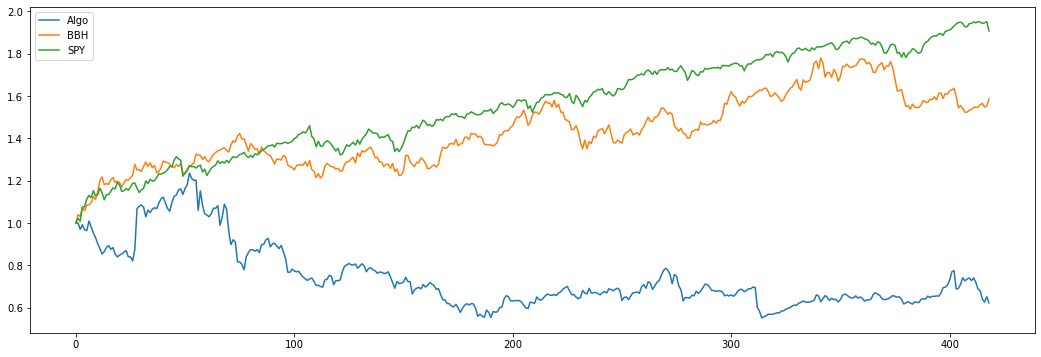

In [28]:
s_scores = pd.DataFrame(index=modified_returns.iloc[59:].index, columns=stocks)
betas = pd.DataFrame(index=modified_returns.iloc[59:].index, columns=stocks)

for t in modified_returns.index[59:]:
    # prepare data
    tmp_ret = modified_returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=stocks, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in stocks:
        X = tmp_ret[etfs].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp
    
# calculate positions in ETFs
algo_weights[etfs] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

# calculate returns
ret = (returns.iloc[119:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

# calculate returns of SPY and BBH for comparison
spy = pd.read_csv('spy_ohlc.csv', index_col=0)
spy_returns = spy['5. adjusted close'].pct_change()
spy_returns = spy_returns.loc[returns.index]
spy_cumret = np.nancumprod(spy_returns.iloc[118:]+1)
bbh_cumret = np.nancumprod(returns.iloc[118:]['BBH']+1)

plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(bbh_cumret/bbh_cumret[0], label='BBH')
plt.plot(spy_cumret/spy_cumret[0], label='SPY')
plt.legend()

In [29]:
results = pd.DataFrame(index=['SPY', 'BBH', 'Algo'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['SPY'] = calculate_metrics(spy_cumret)
results.loc['BBH'] = calculate_metrics(bbh_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results

,total_return,apr,Sharpe,maxDD,maxDDD
SPY,0.907111,0.47444,2.34538,-0.094362,48.0
BBH,0.585783,0.319572,1.282066,-0.147876,105.0
Algo,-0.37695,-0.247651,-0.375014,-0.553706,366.0


In [30]:
modified_returns = ((volume/volume.rolling(60).mean()).loc[returns.index] * returns).dropna()

<ipython-input-31-66d1b58208e8>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
<ipython-input-31-66d1b58208e8>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
<ipython-input-31-66d1b58208e8>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
<ipython-input-31-66d1b58208e8>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
<ipython-input-31-66d1b58208e8>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
<ipython-input-31-66d1b58208e8>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
<ipython-input-31-66d1b58208e8>:33: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
<ipython-input-31-66d1b58208e8>:33: RuntimeWarning: invalid value encountered in sqrt
  si

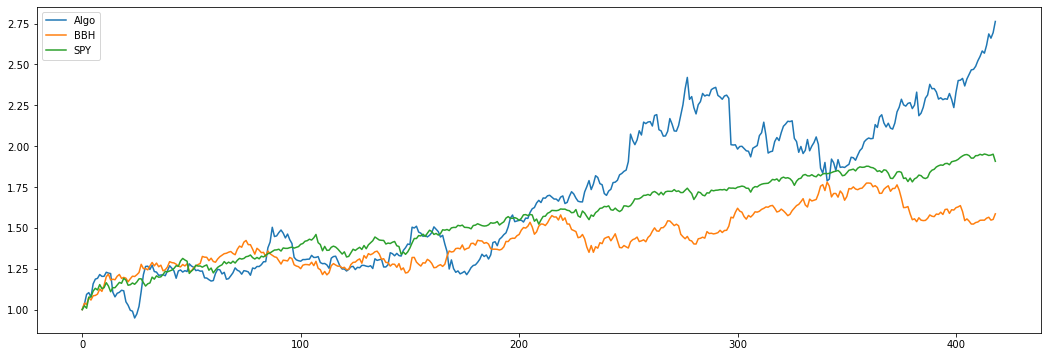

In [31]:
s_scores = pd.DataFrame(index=modified_returns.iloc[59:].index, columns=stocks)
betas = pd.DataFrame(index=modified_returns.iloc[59:].index, columns=stocks)

for t in modified_returns.index[59:]:
    # prepare data
    tmp_ret = modified_returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=stocks, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in stocks:
        X = tmp_ret[etfs].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp
    
# calculate positions in ETFs
algo_weights[etfs] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

# calculate returns
ret = (returns.iloc[119:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

# calculate returns of SPY and BBH for comparison
spy = pd.read_csv('spy_ohlc.csv', index_col=0)
spy_returns = spy['5. adjusted close'].pct_change()
spy_returns = spy_returns.loc[returns.index]
spy_cumret = np.nancumprod(spy_returns.iloc[118:]+1)
bbh_cumret = np.nancumprod(returns.iloc[118:]['BBH']+1)

plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(bbh_cumret/bbh_cumret[0], label='BBH')
plt.plot(spy_cumret/spy_cumret[0], label='SPY')
plt.legend()

In [32]:
results = pd.DataFrame(index=['SPY', 'BBH', 'Algo'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['SPY'] = calculate_metrics(spy_cumret)
results.loc['BBH'] = calculate_metrics(bbh_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results

,total_return,apr,Sharpe,maxDD,maxDDD
SPY,0.907111,0.47444,2.34538,-0.094362,48.0
BBH,0.585783,0.319572,1.282066,-0.147876,105.0
Algo,1.762676,0.842595,1.806236,-0.261477,128.0
